# Tutorial: Surface plot with BrainSpace  
__Content creator:__ Raul R Cruces  
__pod name__: Truthful-inchworms 149

First we load the necessary libraries

In [11]:
#@title Import functions
%matplotlib inline  
!pip install brainspace --quiet
import ipywidgets as widgets  # interactive display
my_layout = widgets.Layout()
import numpy as np
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres, plot_surf
from brainspace.utils.parcellation import map_to_labels
from brainspace.mesh import mesh_cluster
import panel as pn
pn.extension('vtk')
import os # OS to handle paths
import pandas as pd # pandas for data framse
import matplotlib.pyplot as plt # For changing the color maps
from matplotlib import cm # cm=colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from hcp_regions import HCPRegions
import ipywidgets as widgets       # interactive display


## Glasser parcellation: Region Names and Index   
Images taken from:  
> Glasser, Matthew F., et al. "A multi-modal parcellation of human cerebral cortex." [Nature 536.7615 (2016): 171-178.](https://doi.org/10.1073/pnas.1902299116)
<img src="balsa.wustl-1.png" width=75% height=75% /> <img src="balsa.wustl-2.png" width=75% height=75% />

In [12]:
# Region names are entered as strings indexes as int
hcpRegions = HCPRegions()
hcpRegions.what_is('4', verbose=True)
hcpRegions.table

Name of ROI 4
Parcel Index: 8
Area description: Primary Motor Cortex
Other names: BA4, 4a, 4p, M1, PMC, F1
New?: No
Sections: 6,7,8,9
Key studies: Fischl et al 2008, Geyer et al 1996


ParcelIndex AreaName                AreaDescription   New  Sections  \
0              1       V1          Primary Visual Cortex    No       1,2   
1              2      MST  Medial Superior Temporal Area    No      5,15   
2              3       V6              Sixth Visual Area    No    2,3,18   
3              4       V2             Second Visual Area    No       1,2   
4              5       V3              Third Visual Area    No         2   
..           ...      ...                            ...   ...       ...   
175          176    STSva             Area STSv anterior   Yes     11,14   
176          177     TE1m                Area TE1 Middle  Yes*     11,14   
177          178       PI              Para-Insular Area    No  11,12,14   
178          179    a32pr         Area anterior 32 prime  Yes*        19   
179          180      p24              Area posterior 24  Yes*        19   

                     OtherNames  \
0            17, hOC1, OC, BA17   
1             MSTv, hOC5, hOC5v   
2                           112   
3            18, hOC2, OB, BA18   
4    V3d, V3v, VP, hOC3d, hOC3v   
..                          ...   
175                         NaN   
176                         NaN   
177                         IBT   
178                         32'   
179                          24   

                                            KeyStudies  
0    Amunts et al 2000, Fischl et al 2008, Abdollah...  
1    Abdollahi et al 2014, Kolster et al 2010, Mali...  
2    Pitzalis et al 2006, Pitzalis et al 2013, Sere...  
3    Amunts et al 2000, Fischl et al 2008, Schira e...  
4    Abdollahi et al 2014, Rottschy et al 2007, Sch...  
..                                                 ...  
175                                                NaN  
176       von Economo and Koskinas 1925, Triarhou 2007  
177  von Economo and Koskinas 1925, Triarhou 2007, ...  
178                                         Vogt, 2009  
179                                         Vogt, 2009  

[180 rows x 7 columns]

### 1. Load the Glasser annotation file and conte69 surface  
> A. The *surfaces* are a BSPolyData object wrapped on the BrainSpace [VTK interface](https://vtk.org). For more methods of a **BSPolyData** check this [brainspace.vtk_interface.wrappers.data_object.BSPolyData](https://brainspace.readthedocs.io/en/latest/generated/brainspace.vtk_interface.wrappers.data_object.BSPolyData.html). For this example we use the *conte 69* symmetric surface ([Van EWssen et al.; Cereb Cortex. 2012](https://dx.doi.org/10.1093%2Fcercor%2Fbhr291)).  
> B. The annotation file with the ROI's id is a np.array of length of the number of ROI's. The 0 value usually represent the medial wall.

In [13]:
# First load the Glasser annotation file
Glasser = np.loadtxt('glasser_360_conte69.csv', dtype=np.int)

# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()

# Chek the number of vertices of conte69
print('Number of vertices:',surf_lh.n_points + surf_rh.n_points)

# Print the number of ROI in Glasser
print('Number of ROI:', len(np.unique(Glasser)))


Number of vertices: 64984
Number of ROI: 361


/opt/anaconda3/lib/python3.7/site-packages/vtk-8.1.2-py3.7-macosx-10.9-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


### 2. Plot the labels over the surface

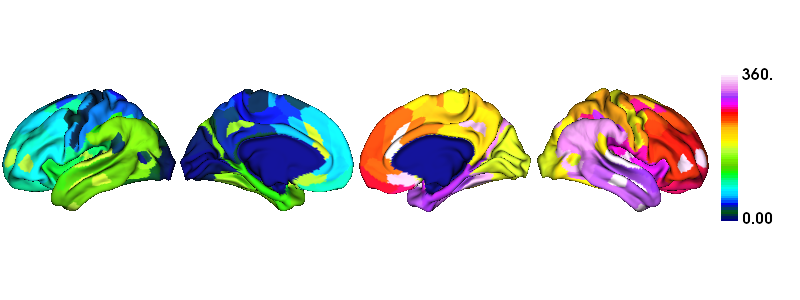

In [14]:
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser, size=(800, 300),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## 3. Mask of the medial wall

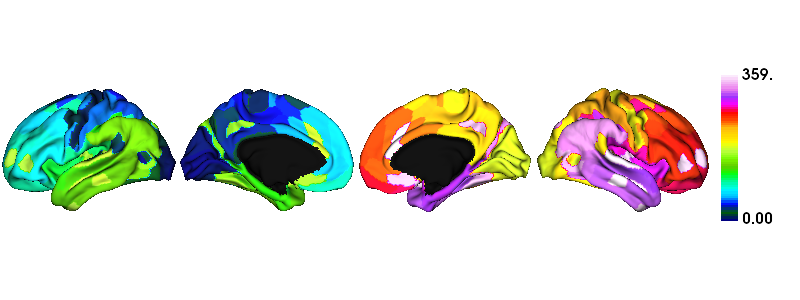

In [15]:
# Mask the 0-value ROI of the medial wall
mask = Glasser != 0

# Create an array of the ROI unique values (Nrois x 1, float)
GlasserROIs = np.asarray(np.unique(Glasser), dtype=float)

# Map ROI values to vertices indexes (Nvertices x 1)
Glasser_masked = map_to_labels(GlasserROIs, Glasser, mask=mask, fill=np.nan)

# Plot ROIs with masked medial wall
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser_masked, size=(800, 300), nan_color=(0, 0, 0, 1),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## 4. ROI of Primary Motor Cortex for QC
> Area description: **Primary Motor Cortex (PMC)**  
Name of ROI: **4**  
Parcel Index: Right=**8**, Left=**8+180**  


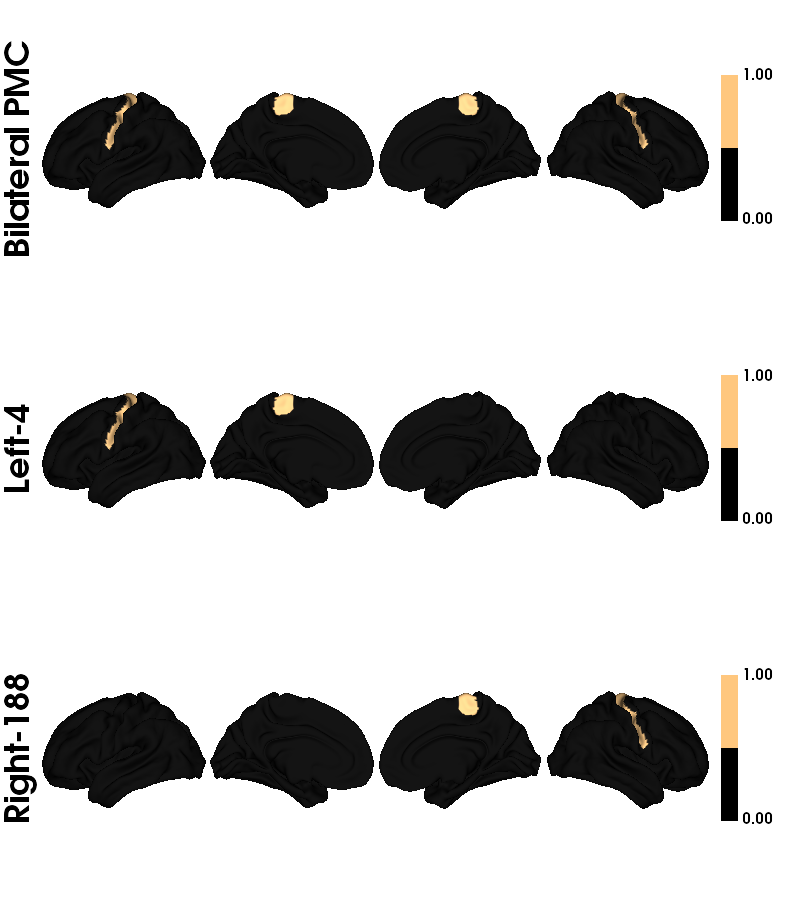

In [17]:
# Plot of an array of surfaces
ROI = 8  # ROI that we want to plot
PMC_labels = ['Bilateral PMC', 'Left-4', 'Right-188'] # Labels for each surface plot

# Create an list with the arrays of surfaces
PMCrois = [None] * 3

# Use conditional operator to find the ROI of interest
PMCrois[0]  = np.where((Glasser == ROI) | (Glasser == ROI+180), 1, 0)
PMCrois[1] = Glasser == ROI
PMCrois[2] = Glasser == ROI+180 # ROI+180 is the right ROI

# Plot of the array
plot_hemispheres(surf_lh, surf_rh, array_name=PMCrois, size=(800, 300*3),label_text=PMC_labels,
                 cmap='copper', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

## Function to plot unique ROIs

In [18]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '800px'
@widgets.interact(
    ROI=widgets.FloatSlider(200., min=0., max=max(GlasserROIs), step=1,
                               layout=my_layout)
)


def plot_glasser_ROI(ROI=8.):
    """Plot the surface of a given ROI/indx of the Glasser parcellation.
    Args
    ----
        region_name_or_index (str or int): the short region name, or its index
    Returns
    -------
    figure : Ipython Image or panel or None
        Figure to plot. None if using vtk for rendering (i.e.,
        ``embed_nb == False``).
    """
    # Get the name and index of a given ROI
    roi, ind, name = hcpRegions.index(ROI)
    
    # Get the labels
    ROIs_labels = [name, 'Left-4'+roi, 'Right-'+roi] # Labels for each surface plot
    # Slice ROI
    
    GlasserROIs = np.asarray(np.unique(Glasser), dtype=int)
    
    # Create an list with the arrays of surfaces
    Conditionals = [(GlasserROIs == ROI) | (GlasserROIs == ROI+180), GlasserROIs == ROI, GlasserROIs == ROI+180]
    ROIs = [None] * 3

        # Map value to surface with medial wall mask
    for i in range(0,3):
        ROIvec = np.where(Conditionals[i], 1, 0)
        ROIs[i]  = map_to_labels(np.asarray(ROIvec, dtype=float), Glasser, mask=mask, fill=np.nan)
    
    # Plot of the array
    return plot_hemispheres(surf_lh, surf_rh, array_name=ROIs, size=(800, 300*3),label_text=ROIs_labels,
                     cmap='copper', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)
  

interactive(children=(FloatSlider(value=200.0, description='ROI', layout=Layout(width='800px'), max=360.0, ste…

## Plot a vector of values to the surface

In [19]:
# Create an array with random values from -1 to 1
rho_rand = np.concatenate((0, np.random.uniform(-1,1,[360,1])), axis=None)

# Map the vector values to the vertices indices
rho_ver = map_to_labels(rho_rand, Glasser, mask=mask,fill=np.nan)

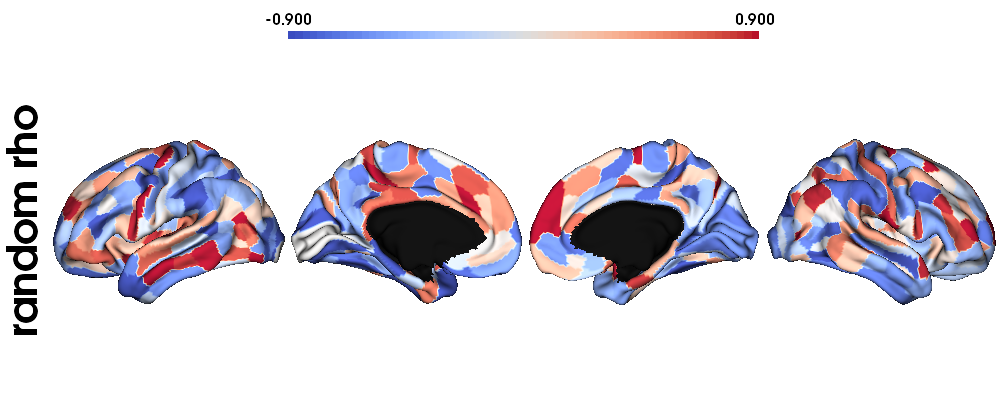

In [20]:
# Plot 
# Label text for column/row. Possible keys are {'left', 'right','top', 'bottom'}
# label_text : dict[str, array-like], optional
#         Label text for column/row. Possible keys are {'left', 'right',
#         'top', 'bottom'}, which indicate the location. Default is None.
Lim = (-0.9, 0.9)
plot_hemispheres(surf_lh, surf_rh,      # Surfaces
                 array_name=rho_ver,    # Vector of alues to plot
                 size=(1000, 400),       # Size of the output figure
                 label_text={'left':['random rho']}, # Text and position
                 color_bar='top',       # Position of the colorbar
                 cmap='coolwarm',       # COlormap from matplotlib
                 zoom=1.25,             # zoom on the surface
                 embed_nb=True,         # Embeded this ins inline plot
                 interactive=False,     # Pop-up plot, for embed_nb=True default is False
                 share='both',          # match to colormap on rows and columns
                 color_range=Lim,       # color range
                 nan_color=(0, 0, 0, 1), # nan-color (medial wall) default black
                 background = (1, 1, 1) # Background color, default is white
                )

## Widget: Rho threshold

## Customize a colormap  
You can change the colormap with the `plot_hemispheres` argument `cmap`. All the colormaps from [matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) are avaliable!.

In [21]:
# Get the colormap function with cm
winter = cm.get_cmap('winter')
cool = cm.get_cmap('cool')

# Create a new colormap merging winter and cool with 0 set to gray
newcolors = np.full((256, 4), [0.5, 0.5, 0.5, 1]) # New colormap with gray color default (shape=256x4)
newcolors[0:int((256/2)), :] = cool(np.linspace(0, 1, int((256/2))))
newcolors[int((256/2)):, :] = winter(np.linspace(0, 1, int((256/2))))

# np.array to colormap
my_colormap = ListedColormap(newcolors)

### Surface plots varying colormaps and color bar position

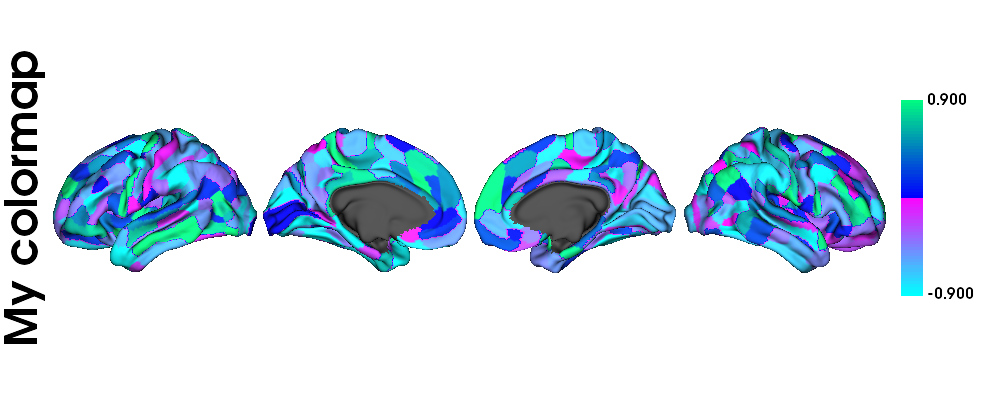

In [22]:
#@title Color bar= Right, Color map = my_colormap, zoom=1.5
Nan_col = (0.25, 0.25, 0.25, 1) # Color for the medial wall

# plot surface
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['My colormap']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='right', cmap=my_colormap, zoom=1.25, color_range=Lim
                )

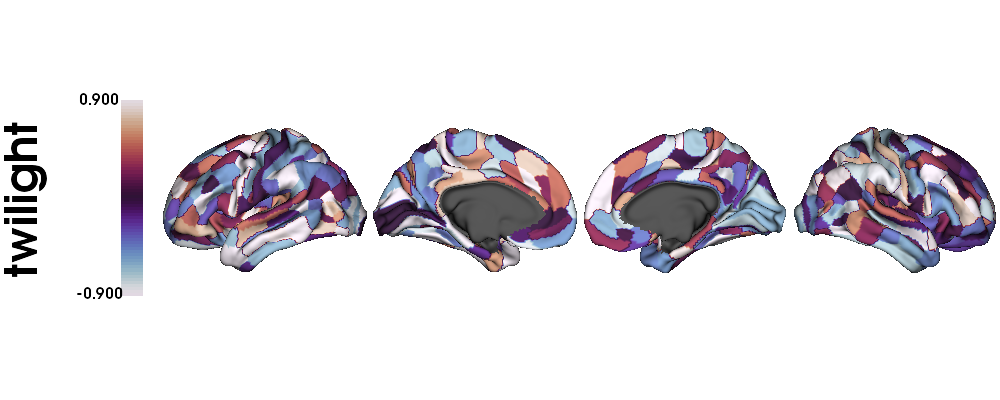

In [23]:
#@title Color bar= left, Color map = twilight, zoom=1.5
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['twilight']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='left', cmap='twilight', zoom=1.25, color_range=Lim
                )

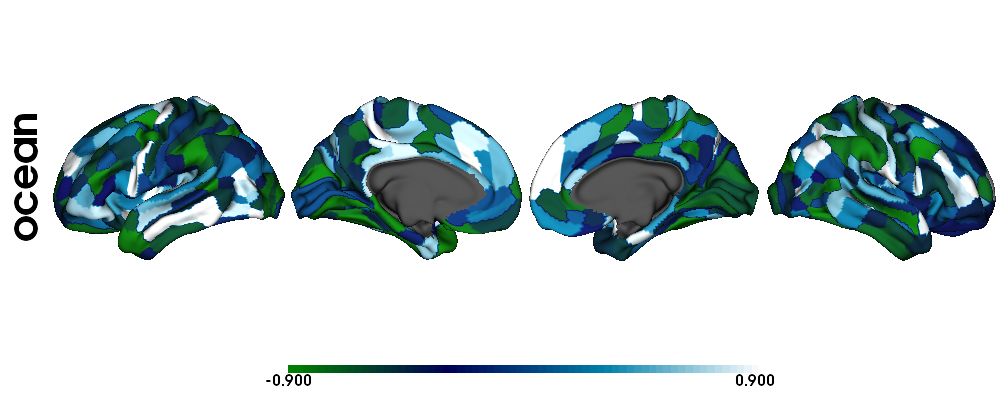

In [24]:
#@title Color bar= bottom, Color map = ocean, zoom=1.5
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['ocean']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='bottom', cmap='ocean', zoom=1.25, color_range=Lim
                )

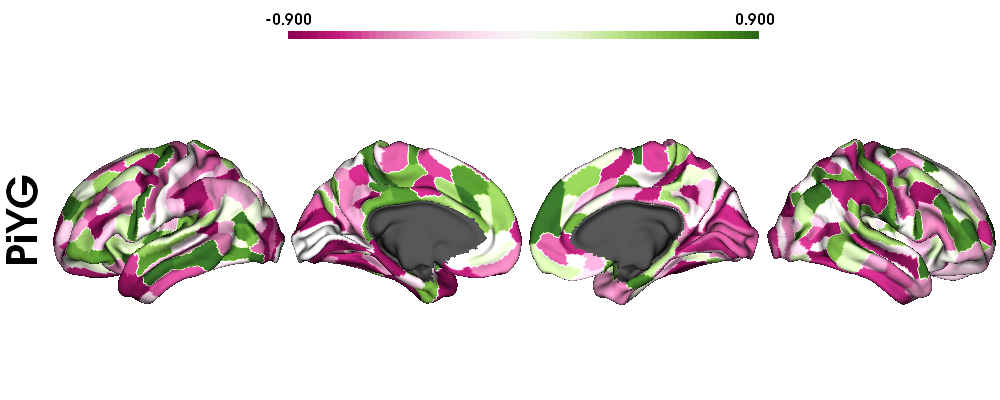

In [25]:
#@title Color bar= top, Color map = PiYG, zoom=1.5
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['PiYG']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='top', cmap='PiYG', zoom=1.25, color_range=Lim
                )

## Changing the range could be helful to visualize some features better

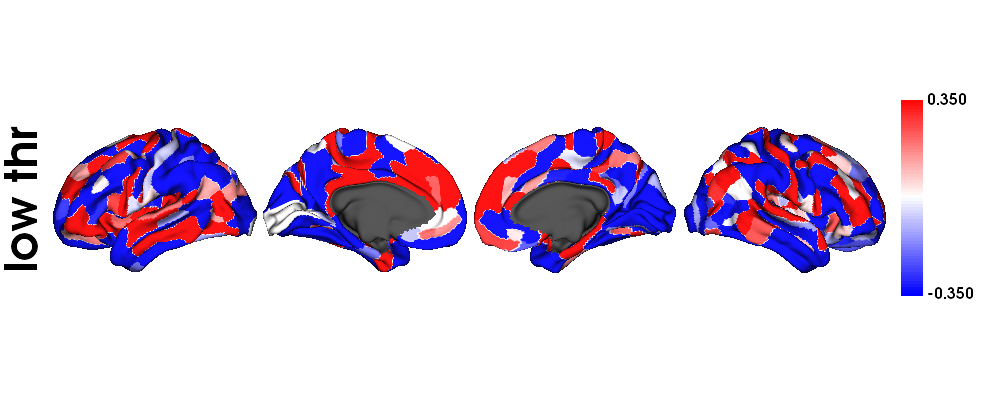

In [27]:
#@title Low threshold, range=(-0.35, 0.35)
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['low thr']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='right', cmap='bwr', zoom=1.25, color_range=(-0.35, 0.35)
                )

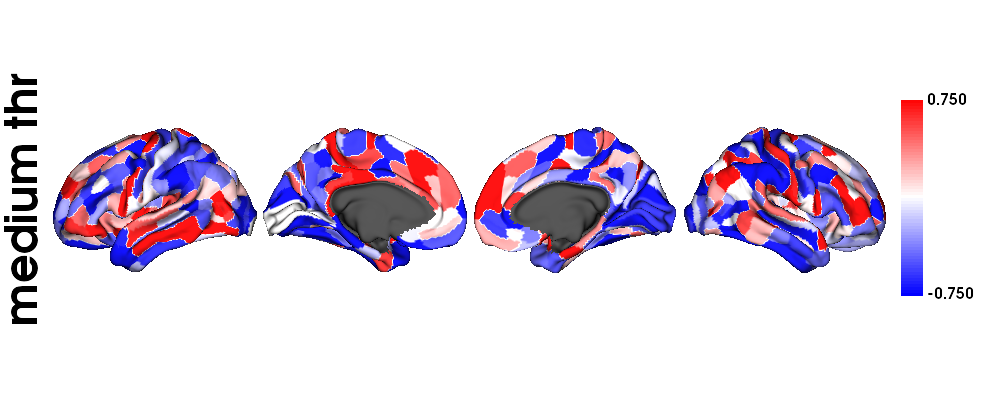

In [28]:
#@title Medium threshold, range=(-0.75, 0.75)
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['medium thr']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='right', cmap='bwr', zoom=1.25, color_range=(-0.75, 0.75)
                )

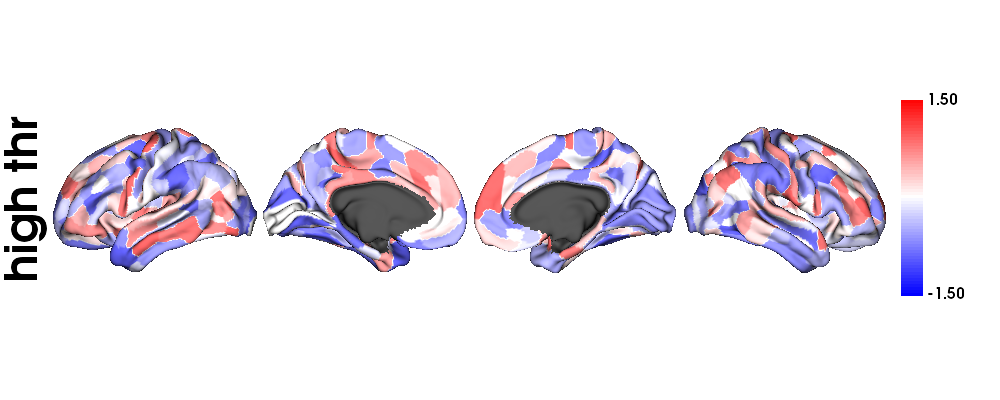

In [29]:
#@title High threshold, range=(-1.5, 1.5)
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['high thr']},
                 embed_nb=True, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='right', cmap='bwr', zoom=1.25, color_range=(-1.5, 1.5)
                )

# Pop-up interactive plot
There is an iteractive option for the surface plot, by setting `embed_nb=False` and `interactive=True` a pop-up window will appear!


In [32]:
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(2000, 500), label_text={'left':['Good to publish']},
                 share='both', nan_color=Nan_col,
                 color_bar='right', cmap='PuOr', zoom=1.25, color_range=(-1.5, 1.5),
                 embed_nb=False, 
                 interactive=True,
                 background = (0, 0, 0) # Set background black
                )

# Screenshot of your plot
There is an optional feature to save your plot as a file with `screenshot = True`. However if this option is set, you should also define the file name and path `filename` and if you want a transparent background or not `transparent_bg = True | False`

In [173]:
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(1000, 400), label_text={'left':['Good to publish']},
                 embed_nb=False, interactive=False, share='both', nan_color=Nan_col,
                 color_bar='right', cmap='PuOr', zoom=1.25, color_range=(-1.5, 1.5),
                 screenshot = True,       # Save the plot
                 transparent_bg = True,   # background for screenshot, default if False
                 filename = '~/Desktop/my_plot_to_publish.png' # Filename to save the screenshot, default is None
                )

'/Users/rcruces/Desktop/my_plot_to_publish.png'

# Section under development, wait for the release of brainspace 0.2.0!!
## Surface clustering

In [151]:
# mesh_cluster(surf_lh, n_clusters=10, mask=mask, approach='ward')

## More settings for surface plotting with **plot_surf**  
### More the layout (2 x 2, 1 x 2, 3 x 3)
### New views {superior, inferior, anterior and posterior}

In [316]:
# Ditionary with the surfaces
# surfs = {'lh': surf_lh, 'rh': surf_rh}
# # Plot Layout (shape = (n_rows, n_cols))
# layout = np.array([['lh', 'lh'], ['rh', 'rh']])
# view = ['lateral', 'medial', 'lateral', 'medial']
# kwds = {'share': 'r'}

In [319]:
# plot_surf(surfs, layout, array_name=rho_ver, view=view, color_bar='bottom',
#               color_range='Sym', share=False, label_text='rho', cmap='twilight',
#               nan_color=(0, 0, 0, 1), zoom=1, background=(1, 1, 1),
#               size=(400, 400), embed_nb=True, interactive=False, scale=(1, 1),
#               transparent_bg=True, screenshot=False, filename=None,
#               return_plotter=True)